In [2]:
%matplotlib inline

In [7]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import numpy as np


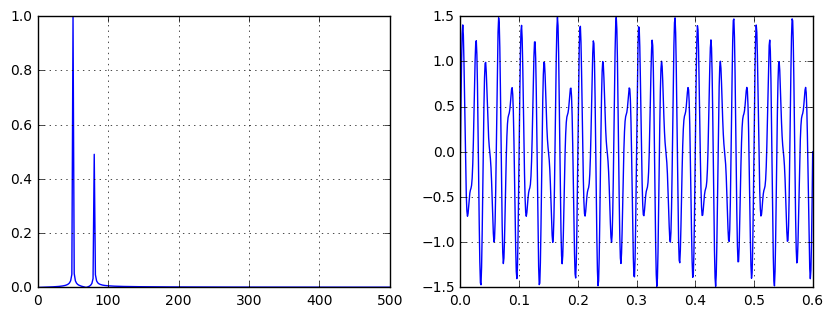

In [23]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.figure(figsize = (10, 3.5))
plt.subplot(121)
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid()
plt.subplot(122)
plt.plot(x, y)
plt.grid()

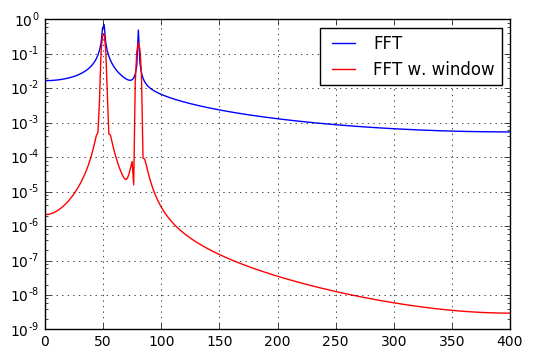

In [27]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.semilogy(xf[1:N/2], 2.0/N * np.abs(yf[1:N/2]), '-b')
plt.semilogy(xf[1:N/2], 2.0/N * np.abs(ywf[1:N/2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()


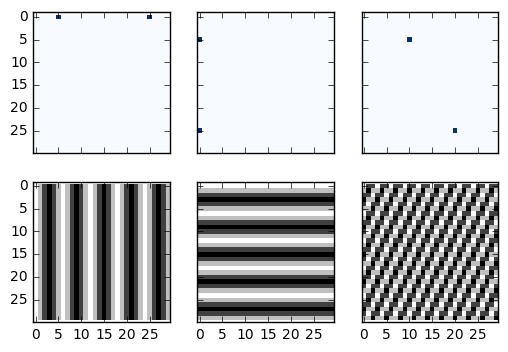

In [45]:
from scipy.fftpack import fftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = fftn(xf)
ax1.imshow(xf, cmap=cm.Blues, interpolation='none')
ax4.imshow(np.real(Z), cmap=cm.gray, interpolation='none')

xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = fftn(xf)
ax2.imshow(xf, cmap=cm.Blues, interpolation='none')
ax5.imshow(np.real(Z), cmap=cm.gray, interpolation='none')

xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = fftn(xf)
ax3.imshow(xf, cmap=cm.Blues,interpolation='none')
ax6.imshow(np.real(Z), cmap=cm.gray, interpolation='none')


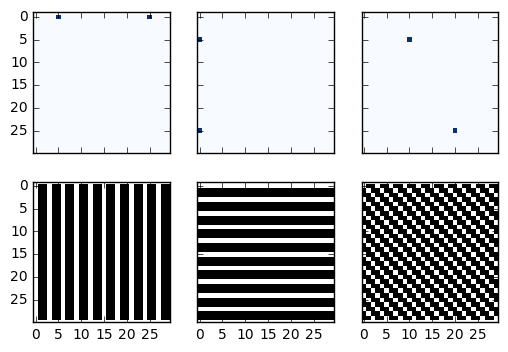

In [53]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = fftn(xf)
ax1.imshow(xf, cmap=cm.Blues, interpolation='none')
ax4.imshow(np.real(Z)**2, cmap=cm.gray, interpolation='none')

xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = fftn(xf)
ax2.imshow(xf, cmap=cm.Blues, interpolation='none')
ax5.imshow(np.real(Z)**2, cmap=cm.gray, interpolation='none')

xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = fftn(xf)
ax3.imshow(xf, cmap=cm.Blues,interpolation='none')
ax6.imshow(np.real(Z)**2, cmap=cm.gray, interpolation='none')


In [173]:
from numpy import linspace , arange , reshape ,zeros
from scipy.fftpack import fft2 , fftfreq
from cmath import pi
import scipy as sp
# create some arbitrary data
some_data = np.arange(0.0 , 16384.0 , dtype = complex)
some_data = np.sin(some_data/128)
# reshape it to be a 128x128 2d grid

# some_data_grid = reshape(some_data , (128 , 128) )
some_data_grid = np.zeros((128, 128))
some_data_grid[5, 0] = 1
some_data_grid[128-5, 0] = 1

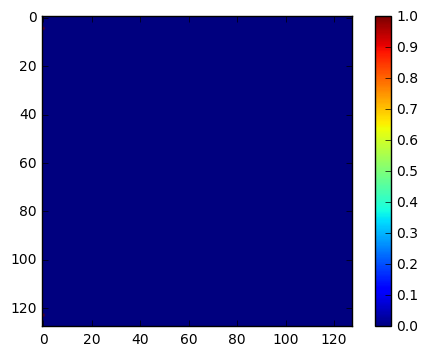

In [174]:
plt.imshow(np.real(some_data_grid))
plt.colorbar()

In [175]:


# assign some real spatial co-ordinates to the grid points   
# first define the edge values
x_min = -250.0
x_max = 250.0
y_min = -250.0
y_max = 250


In [176]:

# then create some empty 2d arrays to hold the individual cell values
x_array = zeros( (128,128) , dtype = float )
y_array = zeros( (128,128) , dtype = float )

In [177]:

# now fill the arrays with the associated values
for row , y_value in enumerate(linspace (y_min , y_max , num = 128) ):
    for column , x_value in enumerate(linspace (x_min , x_max , num = 128) ):
        x_array[row][column] = x_value
        y_array[row][column] = y_value

In [178]:
# now for any row,column pair the x_array and y_array hold the spatial domain
# co-ordinates of the associated point in some_data_grid

# now use the fft to transform the data to the wavenumber domain
some_data_wavedomain = fft2(some_data_grid)

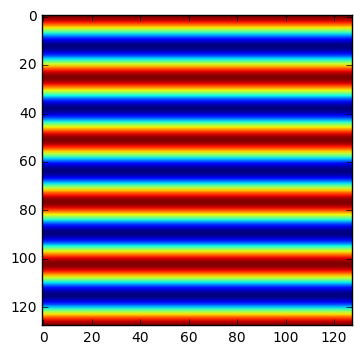

In [179]:

plt.imshow((np.real(some_data_wavedomain))) 

In [180]:

# now we can use fftfreq to give us a base for the wavenumber co-ords
# this returns [0.0 , 1.0 , 2.0 , ... , 62.0 , 63.0 , -64.0 , -63.0 , ... , -2.0 , -1.0 ]
n_value = fftfreq( 128 , (1.0 / 128.0 ) )


In [181]:
# now we can initialize some arrays to hold the wavenumber co-ordinates of each cell
kx_array = zeros( (128,128) , dtype = float )
ky_array = zeros( (128,128) , dtype = float )

In [182]:


# before we can calculate the wavenumbers we need to know the total length of the spatial
# domain data in x and y. This assumes that the spatial domain units are metres and
# will result in wavenumber domain units of radians / metre.
x_length = x_max - x_min
y_length = y_max - y_min


In [183]:

# now the loops to calculate the wavenumbers
for row in xrange(128):
    for column in xrange(128):
        kx_array[row][column] = ( 2.0 * pi * n_value[column] ) / x_length
        ky_array[row][column] = ( 2.0 * pi * n_value[row] ) / y_length

# now for any row,column pair kx_array , and ky_array will hold the wavedomain coordinates
# of the correspoing point in some_data_wavedomain

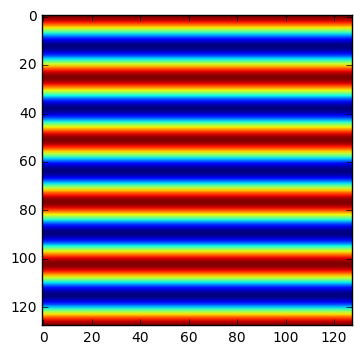

In [184]:
plt.imshow(np.real(some_data_wavedomain))

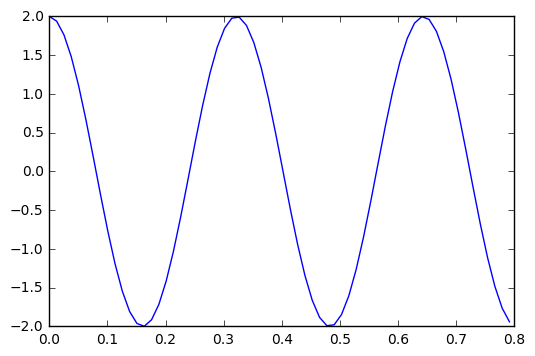

In [188]:
N = 128

plt.plot(ky_array[:N/2, 1], np.real(some_data_wavedomain)[:N/2, 1])

 http://stackoverflow.com/questions/7161417/how-to-calculate-wavenumber-domain-coordinates-from-a-2d-fft